In [40]:
import os, ctypes
from scipy import integrate, LowLevelCallable
import numpy as np
import matplotlib.pyplot as plt
import copy 
import scipy as sp
import scipy.signal 
lib = ctypes.CDLL(os.path.abspath('testlib.so'))
lib.f.restype = ctypes.c_double
lib.f.argtypes = (ctypes.c_int, ctypes.POINTER(ctypes.c_double),
                  ctypes.c_void_p)

c = ctypes.c_double(1.0)
user_data = ctypes.cast(ctypes.pointer(c), ctypes.c_void_p)

func = LowLevelCallable(lib.f, user_data)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
integrate.nquad(func, [[0, 10], [-10, 0], [-1, 1]])

(1200.0000000000002, 1.3322676295501882e-11)

/global/cfs/cdirs/des/zhou/spt_selection/heidicode/mass_function.py:21: RuntimeWarning: divide by zero encountered in log
  n = np.log(hist_data[0])  #numbers in each bin
/global/cfs/cdirs/des/zhou/spt_selection/heidicode/mass_function.py:30: RuntimeWarning: invalid value encountered in double_scalars
  slope = (n[i + 1] - n[i]) / (bins[i + 1] - bins[i])


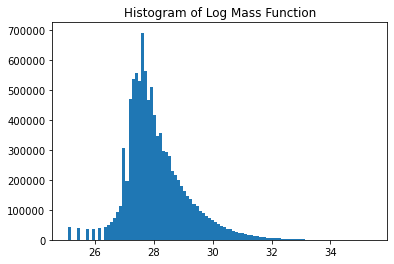

In [17]:
from mass_function import MassFunction
mf = MassFunction()
%run /global/project/projectdirs/des/zhou/spt_selection/header.py

In [18]:
lnM = np.log(mf.mass)
nh = len(lnM)

(array([2.77300e+05, 1.53682e+05, 8.18420e+04, 4.11570e+04, 1.91360e+04,
        7.75400e+03, 2.57200e+03, 7.13000e+02, 9.20000e+01, 9.00000e+00]),
 array([29.93603 , 30.483715, 31.031399, 31.579084, 32.12677 , 32.674454,
        33.22214 , 33.769825, 34.31751 , 34.865196, 35.41288 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

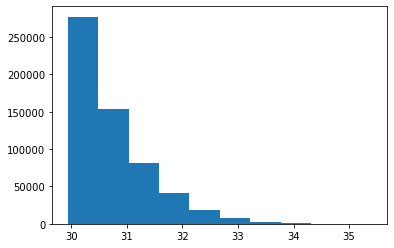

In [19]:
plt.hist(lnM)

In [20]:
lnMwl_mean = copy.deepcopy(lnM)
lnlam_mean = alpha_lam * lnM + pi_lam
lnSZ_mean = alpha_SZ * lnM + pi_SZ

In [24]:
from monte_carlo_observable import MonteCarloObservables

mco = MonteCarloObservables(nh,
                            0.5,
                            np.log(mf.mass),
                            lnlam_mean=lnlam_mean,
                            lnSZ_mean=lnSZ_mean,
                            lnMwl_mean=lnMwl_mean,
                            scatter_lam=scatter_lam,
                            scatter_Mwl=scatter_Mwl,
                            scatter_SZ=scatter_SZ,
                            mf_slope_interp=mf.beta)
NBINS = 1

In [29]:
lam1 = 10
lam2 = 50
sz1 = 0.02
sz2 = 1

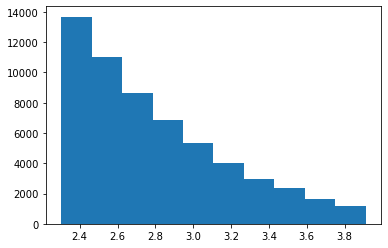

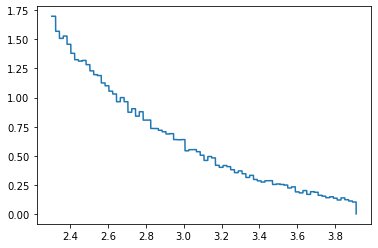

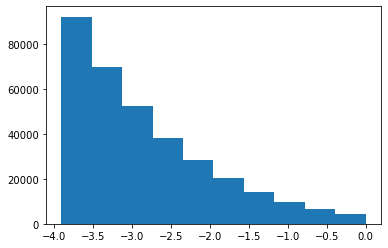

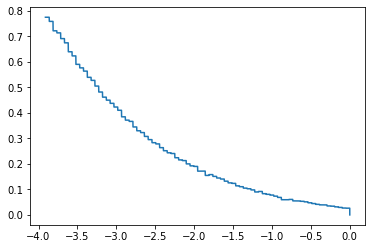

Lam bounds are 2.302585092994046 3.912023005428146
SZ bounds are -3.912023005428146 0.0
The normalization factors are: 1 1


32it [00:08,  3.89it/s]


KeyboardInterrupt: 

In [25]:
lam_array, SZ_array, diff_array, count_array = mco.mc_calculate_mean_mwl_given_lam_sz(
    lam1=lam1, lam2=lam2, sz1=sz1, sz2=sz2, nbins=NBINS + 1, correction=True)
# lam_array_nc, SZ_array_nc, diff_array_nc, count_array_nc = mco.MC_calculate_mean_Mwl_given_lam_SZ(nbins = NBINS+1,correction=False)

print(count_array)
print(np.exp(diff_array))

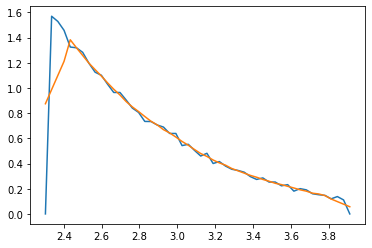

In [51]:
x = np.linspace(np.log(lam1),np.log(lam2),50)
p_lam = mco.lam_pdf(x)
smooth = scipy.signal.savgol_filter(p_lam,7,1)
plt.plot(x,mco.lam_pdf(x))
plt.plot(x,smooth)

In [ ]:
mco.